
우리가 알거니와 하나님을 사랑하는 자 곧 그의 뜻대로 부르심을 입은 자들에게는 모든 것이 합력하여 선을 이루느니라. 롬8:28  

And we know that in all things God works for the good of those who love him, who have been called according to his purpose. (Rom 8:28)

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# 제 2 강 신경망을 내 손으로 만져보기(tf.keras & XOR)

---------


2000년대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었습니다. 이렇게 인공 신경망에 기반을 둔 딥러닝이 다시 주목받게 된 계기가 되었습니다. 

인공 지능의 발전사에서 약간의 의미가 있었던 XOR 문제를 이제 어렵지 않게 풀어볼 수 있는 문제가 되었습니다. 

## 5. XOR 연산 다층 신경망을 텐서플로로 다루기


<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-xor.png?raw=true" width="500">
<center>그림 2:  XOR 연산을 위한 다층 인공 신경망</center>


텐서플로를 주피터 노트북 내에서 사용하려면, 텐서플로 라이브러리를 import해야 합니다. 
- tensorflow을 import하면, __tensorflow__라는 긴 이름을 대신 짧은 이름 __tf__를 사용할 수 있도록 다음과 같이 import하고, version도 체크할 수 있습니다. tensorflow는 2.x 버전을 사용합니다. 

In [43]:
import tensorflow as tf
print(tf.__version__)

2.3.0


XOR 연산을 위한 2단의 Dense Layer로 구성하였습니다. Dense는 기본적인 레이어로, 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 레이어입니다. Dense Layer는 아래와 같이 선언이 가능합니다.

```
tf.keras.layers.Dense()
```

각각의 Layer는 순차적으로 배치되어있습니다. 이를 Sequential 신경망이라고 합니다. 이것은 아래와 같이 선언합니다.
```
tf.keras.Sequential()
```
Sequential() Dense Layer를 2층으로 쌓도록 합니다.

In [44]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

순차적인 신경망안에 두개의 Dense Layer를 배치하고, 첫번째 Dense Layer는 2개의 뉴런을 선언하였고, 각 뉴런은 sigmoid를 활성함수로 가집니다. 입력 값은 두개이므로 모양이 (2,) 모양입니다. 두번째 Dense Layer는 1개의 뉴런을 선언하고, 마찬가지로 sigmoid 활성함수를 사용하였습니다.

XOR연산이므로, 입력 x와 출력(레이블, 타깃) y값은 다음과 같습니다.

In [45]:
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) 
y = np.array([[0], [1], [1], [0]])

이제는 model을 준비시키는 명령어를 사용하여 최적화 함수(optimizer)와 손실 함수(loss)를 정의합니다. 

In [46]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), # 'adam', 'sgd', ...
    loss = 'mse',                                           # 'mean_squared_error' 'binary_crossentropy'
    metrics = ['accuracy'])

tf.keras에서는 다양한 최적화 함수와 손실 함수를 제공합니다. 그 중에서도 SGD(Stochastic Gradient Descent)는 확률적 경사 하강법이라고 합니다. 경사 하강법은 앞선 포스팅에서 설명하였고, 이 경사 하강법을 한번에 계산(전체 데이터세트를 사용)하지 않고 확률을 이용하여 부분적으로 나눠서 계산을 한다는 의미입니다.

SGD(Stochastic Gradient Descent)

- 기존의 경사 하강법은 데이터세트의 크기가 너무 커지면 계산이 오래 걸리는 단점이 있었습니다.
- SGD는 반복당 하나의 데이터(Batch=1)만을 사용하여 적은 계산으로 기울기를 얻어내는 방식입니다.
- 단점: 반복이 충분하면 효과는 좋지만, 노이즈가 심합니다. 최저점을 찾는다는 보장이 없습니다. 가능성만 높을 뿐입니다.
- 위의 단점을 극복하기 위해서 미니 배치 SGD가 있습니다. 배치를 너무 크게도 너무 작게도 잡지 않고 SGD보다 노이즈는 적게, 일반 경사 하강법보다는 효율적으로 찾는 방식입니다. 

손실 함수(Loss Function)은 RMSE의 제곱인 MSE를 사용하기로 합니다.

아래와 같이, summary() 메소드를 사용하여 형성된 신경망의 구조를 살펴볼 수 있습니다.

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


파라미터는 첫번째 Layer에서 입력값에 가중치가 곱해지고 편향이 더해져서 은닉층의 각 노드에 3개의 파라미터가 전달되어 총 6개입니다. 두번째 Layer에서는 첫 Layer에서 나온 출력 값 두개와 편향을 합쳐서 총 3개의 값이 두번째 층에 전달되어 결과적으로 하나의 출력(예측) 값이 나오게 됩니다.

In [56]:
history = model.fit(x, y, epochs = 10000, batch_size = 1, verbose = 0)
print(model.evaluate(x, y))

1/1 [==============================] - 0s 997us/step - loss: 3.3606e-04 - accuracy: 1.0000
[0.00033605878707021475, 1.0]


학습을 진행하면 위와 같은 출력이 나오며, 손실 값을 알려줍니다. 손실 값은 학습을 진행할수록 0에 가까워지는 것을 확인할 수 있습니다.

이제 제대로 학습이 되었는지 확인해봅니다. 아래의 코드를 통해서 x에 대한 예측 값을 출력 받을 수 있습니다.

In [57]:
print(model.predict(x))
print(model.predict_classes(x))

[[0.0163497 ]
 [0.9791055 ]
 [0.982618  ]
 [0.01839039]]
[[0]
 [1]
 [1]
 [0]]


In [58]:
# 다음과 같은 코드를 사용하면 경고(predict_classes) 메시지를 피할 수 있습니다. 
print(model.predict(x))    
print((model.predict(x) > 0.5).astype("int32"))

[[0.0163497 ]
 [0.9791055 ]
 [0.982618  ]
 [0.01839039]]
[[0]
 [1]
 [1]
 [0]]


정답은 0, 1, 1, 0 순서입니다. 각각 0과 1에 해당하는 수에 가깝게 나오고 있는것을 확인 할 수 있습니다. 이는 학습을 더 많이 할수록 더 정답에 해당하는 수치로 갈것 입니다.

이제는 가중치와 편향 값을 확인해봅니다.

In [59]:
for weight in model.weights: 
    print(weight)

<tf.Variable 'dense_13/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.741399, -6.149927],
       [ 5.537483,  6.260818]], dtype=float32)>
<tf.Variable 'dense_13/bias:0' shape=(2,) dtype=float32, numpy=array([-2.9901671,  3.1215343], dtype=float32)>
<tf.Variable 'dense_14/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 9.544876],
       [-9.082703]], dtype=float32)>
<tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([4.264867], dtype=float32)>


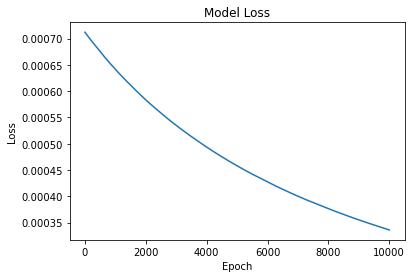

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

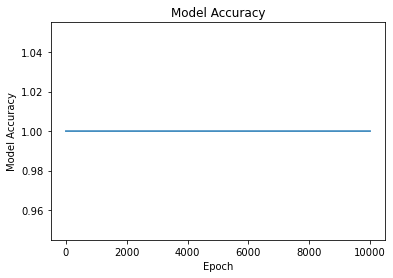

In [61]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.show()

## 6. Tweaking the model.
- increasing the number of hidden layers or nodes 
- trying to use different activation functions or optimizer
- using different batch sizes, 1 or 4

In [19]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [20]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

#### Question: 

Is it possible to solve XOR with no activation function at all, using more neurons or layers?

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='linear', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x

-------
__Be joyful always!__ 1 Thes.5:16